<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/7%EC%A3%BC%EC%B0%A8/7_2_%EC%8B%AC%EC%B8%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_kiy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심층 신경망

## 2개의 층

[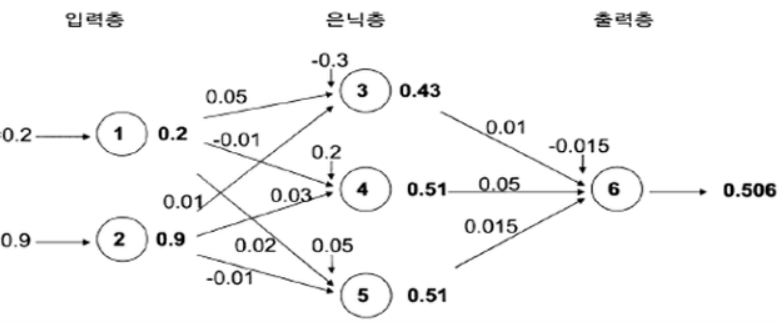](https://)

## 다층 퍼셉트론의 구조
(1) 입력층(Input-Layer): 데이터를 입력받는 뉴런들로 구성된 층을 말한다. 예를 들어 훈련데이터(Training data set)가 8개의 속성으로 구성된 데이터라고 가정하면 입력층의 뉴런은 총 9개(8개 속성 + bias)의 뉴런으로 구성될 것이다. 

(2) 은닉층(Hidden-Layer): 입력층을 통해 전달된 신호를 받아 특징을 추출하고 학습한다.(정확히는 output layer의 오차를 최소화하는 가중치를 학습한다.)

(3) 출력층(Output-Layer): 은닉층을 통해 계산된 신호들을 받아 최종적으로 분류를 실행하여 결과를 반환한다. 

(4) 깊이(Depth): 몇개의 층이 존재하는가를 깊이(Depth)로 표현한다. 깊은(or심층:Deep)층을 갖고 데이터를 학습한다 하여 깊이가 긴 즉 층이 엄청 많은 MLP를 우리는 딥러닝(Deep-learning)이라 부른다

In [1]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [4]:
model = keras.Sequential([dense1, dense2])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법

In [6]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [7]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.5647 - accuracy: 0.8067
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4078 - accuracy: 0.8541
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3733 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3503 - accuracy: 0.8730
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3318 - accuracy: 0.8786


## 렐루 활성화 함수

[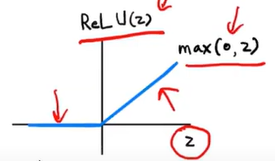](https://)

## Sigmoid의 한계

Sigmoid 함수는 binary classification 에 적절함 함수다. 일정 값을 기준으로 0인지 1인지구분함으로써 분류하는 방식이다. 딥러닝에서는 특정 임계치를 넘을 때만 활성화되기 때문에 activation function 중의 하나로 구분되는 함수다.
보통 처음은 input layer, 마지막은 output layer 라고 하는데, 이 가운데 보이지 않는 부분은 hidden layer로 칭한다. 실제로 9개의 hidden layer 가 있다고 했을 때 Tensorflow에 돌려 보면 정확도가 0.5밖에 안되는.. 1개 hidden layer일때 보다도 못한 결과가 나오게 된다. 왜 이런 문제가 발생할까?

1. backpropagation(1986): 2단 3단 정도의 레이어는 학습이 잘 되나, 9단, 10단으로 넘어가면서 부터는 학습이 제대로 이루어 지지 않는 이유는, 역전파 방식에 있다고 볼 수 있다. 레이어가 많을 경우 각각의 단계의 값을 미분해서 최초 레이어까지 결과 값을 전달해가게 되는데, 만약 내부의 hidden layer들이 모두 sigmoid 함수로 이루어져 있다면 각 단계에서 계산한 값은 모두 0과 1 사이의 값일 수밖에 없다.
2. Vanishing Gradient: 따라서 여러 레이어를 갖고 있을 때, 최초 입력 값은 각각의 레이어에서 나온 값들을 곱해준 만큼의 결과에 영향을 주는 것이므로 최종 미분값은 결국 0에 가까운 값이 될 수 밖에 없다. 이를 경사도(기울기)가 사라지는 현상으로 본다. 최초 입력 값이 최종 결과 값에 별로 영향을 끼치지 않는다는 결론으로 수렴하게 되는 것이다.
sigmoid 함수는 0<n<1 사이의 값만 다루므로 결국 chain rule을 이용해 계속 값을 곱해나간다고 했을 때 결과 값이 0에 수렴할 수 밖에 없다는 한계를 가지고 있으므로, 나중에는 1보다 작아지지 않게 하기 위한 대안으로 ReLU라는 함수를 적용하게 된다.

### 활성화 함수 종류
[http://www.incodom.kr/%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98](https://)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5297 - accuracy: 0.8144
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3913 - accuracy: 0.8593
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3553 - accuracy: 0.8716
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3341 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3202 - accuracy: 0.8873


In [15]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3558 - accuracy: 0.8821


[0.35578927397727966, 0.8820833563804626]

## 옵티마이저

### optimizer란?
1. 학습 데이터(Train data)셋을 이용하여 모델을 학습 할 때 데이터의 실제 결과와 모델이 예측한 결과를 기반으로 잘 줄일 수 있게 만듦
2. 모델을 제대로 설계하기 위해서 옵티마이저가 어떤 원리로 만들어졌는지 아니면 어떤 방식에 유리한지를 알아야 함.
3. 현재 가장 많이 사용하는 옵티마이저는 Adam이다. 활성화 함수로 Relu를 가장 많이 활용하는 것처럼 Adam이 빠르기도 하면서 성능도 좋음.

[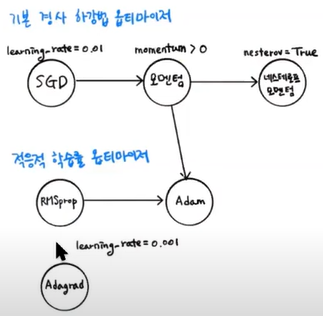](https://)

[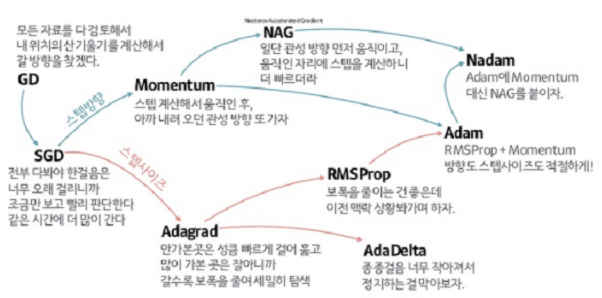](https://)

In [16]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [17]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [18]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

#### NAG : Nesterov Accelrated Gradient
 네스테로프 모멘텀은 momentum값과 gradient값이 더해저 실제(actual)값을 만드는 기존 모멘텀과 달리 momentum값이 적용된 지점에서 gradient값이 계산. 수식으로 보면 gradient를 구할 때 분모()의 W(가중치)에 먼저 mV(t-1)값을 더해 계산함. 
 
이 단계를 추가함으로 V(t)를 계산하기 전 모멘텀 방법으로 인해 이동될 방향을 미리 예측하고 해당 방향으로 얼마간 미리 이동한 뒤 gradient를 계산한는 효과를 얻을 수 있습니다. 즉 한 단계를 미리 예측함으로써 불필요한 이동을 줄입니다.

[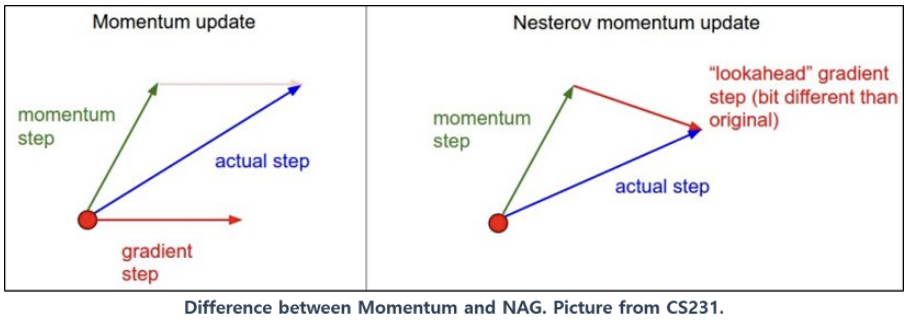](https://)



In [19]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True) #NAG

In [20]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [22]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5242 - accuracy: 0.8171
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3937 - accuracy: 0.8602
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8720
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3293 - accuracy: 0.8784
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3064 - accuracy: 0.8876


In [24]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8792


[0.33326372504234314, 0.8791666626930237]

## Randomforest vs 신경망
Randomforest: 앙상블 모델, 각각의 개별 트리가 독립적으로 훈련되고 이들을 합침 (트리가 서로 영향을 주지 않음), 앙상블이 된 결과 위에 또다른 층을 쌓을 수 없음. GB, 스태킹도 마찬가지로 순차적으로 훈련이 됨. DB, 엑셀과 같은 정형화된 데이터에 최적화됨.

신경망: 은닉층의 개별 유닛들이 한꺼번에 동시에 훈련이 됨. 여러 개의 층을 쌓아서 순차적으로, 단계적으로 학습이 가능함. 다수의 층을 쌓아서 훈련하기 용이함. "이미지, 텍스트" 같은 비정형화된 데이터에 최적화됨. '층'이 있기 때문에 feature engineering으로 특징, 패턴을 찾는 표현학습이 가능해짐. 
